In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [21]:
input_data = df[['Mileage']]
output_data = df['Price']

In [22]:
regr1 = linear_model.LinearRegression()

In [23]:
regr1.fit(input_data,output_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
regr1.score(input_data,output_data)

0.020463447323489481

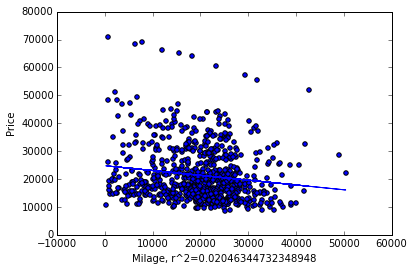

In [25]:
plt.scatter(input_data,output_data)
plt.xlabel('Milage, r^2={}'.format(regr1.score(input_data,output_data)))
plt.ylabel('Price')
plt.plot(input_data,regr1.predict(input_data))

In [26]:
clean = df.drop(['Make','Model','Trim','Type'],axis=1)

In [34]:
clean = clean.drop('Price',axis=1)

In [28]:
input_data = df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
output_data = df['Price']

In [29]:
regr2 = linear_model.LinearRegression()

In [30]:
regr2.fit(input_data,output_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
regr2.score(input_data,output_data)

0.4462643536728379

In [40]:
regr3 = linear_model.LinearRegression()

In [41]:
combos = [list(itertools.combinations(clean.columns,x)) for x in range(1,8)]

In [42]:
combo_list = []
for perm in combos:
    for combo in perm:
        combo_list.append(list(combo))

In [45]:
count = 0
r = [0]
index = []
while count < len(combo_list):
    regr3.fit(df[combo_list[count]],output_data)
    if regr3.score(df[combo_list[count]],output_data) > r[-1]:
        r.append(regr3.score(df[combo_list[count]],output_data))
        index.append(combo_list[count])
    count += 1
print(r)
print(index)

[0, 0.020463447323489481, 0.32385903759512258, 0.33982070826367505, 0.34346053658303799, 0.38394913240273443, 0.40237458603160192, 0.40380272693971553, 0.41914964510731778, 0.42250742147747633, 0.4225307670398466, 0.42409748258510394, 0.4369402151237245, 0.43780574153663798, 0.44569092105870245, 0.4462643536728379]
[['Mileage'], ['Cylinder'], ['Mileage', 'Cylinder'], ['Cylinder', 'Doors'], ['Cylinder', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise'], ['Cylinder', 'Cruise', 'Leather'], ['Mileage', 'Cylinder', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise', 'Leather'], ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather'], ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound'], ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather'], ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]


In [47]:
regr3.fit(df[['Cylinder']],output_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
regr3.score(df[['Cylinder']],output_data)

0.32385903759512258

# Part 2 Results 

* Looking at the data above it does not appear that our current data supports a strong corralation between any number of factors and price.
* The strongest single variable was Cylinder which got a r^2 of .32 when the entire data set only ever got to a r^2 of .45.  This suggests that it is the most predictive element, even if not terribly accurate. 